In [33]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
df = pd.read_csv("C:\\Users\\parth\\OneDrive\\Desktop\\ML_CSV\\loan_approval.csv")
df.columns

Index(['Age', 'Income', 'CreditScore', 'LoanAmount', 'EmploymentYears',
       'Approved'],
      dtype='object')

In [35]:
approved_customers = df[df['Approved'] == 1]
approved_customers.head()

,Age,Income,CreditScore,LoanAmount,EmploymentYears,Approved
3,27,74240,839,8756,6,1
8,30,46641,760,15147,8,1
11,55,43093,689,10779,11,1
13,43,71885,749,19153,10,1
19,57,55777,673,15541,9,1


In [36]:
x = df.drop('Approved',axis="columns")
y = df.Approved

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [38]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [39]:
importances = model.feature_importances_
featuers_name = df.columns[:-1]

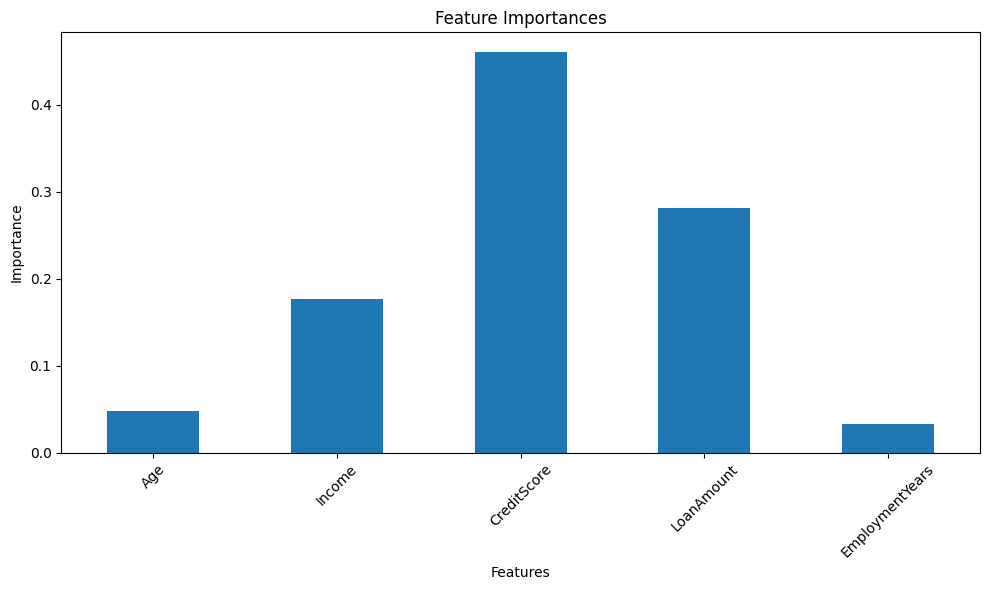

In [40]:
forest_importances = pd.Series(importances,index=featuers_name)
fig,ax = plt.subplots(figsize=(10,6))
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature Importances")
ax.set_ylabel("Importance")
ax.set_xlabel("Features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [41]:
model.predict([[28, 35000, 650, 20000, 2]])

C:\Users\parth\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [42]:
model.score(X_test,y_test)

0.9833333333333333

In [43]:
model.score(X_train,y_train)

1.0

In [44]:
y_predicted = model.predict(X_test)

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)
cm

array([[51,  1],
       [ 0,  8]])

Text(95.72222222222221, 0.5, 'Truth')

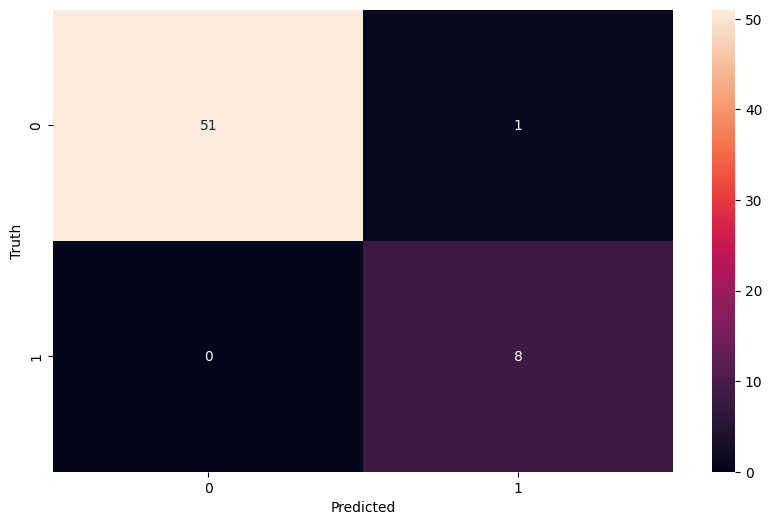

In [47]:
import seaborn as sn
plt.figure(figsize=(10,6))
sn.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [49]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_predicted)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.89      1.00      0.94         8

    accuracy                           0.98        60
   macro avg       0.94      0.99      0.97        60
weighted avg       0.99      0.98      0.98        60

